In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import scipy

from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import sph_harm
from scipy.optimize import curve_fit

pi = math.pi   # definition of pi


# COBE Blackbody Spectrum

The Cosmic Microwave Background (CMB) has a blackbody spectrum.  The COBE satellite, pictured below, launched in 1989 and ultimately provided a spectacular measurement of the spectrum of the CMB.  

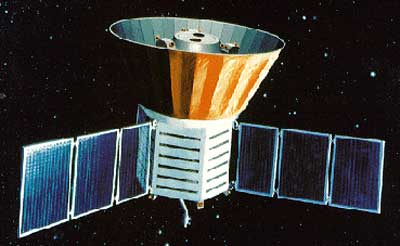

Planck's law defines the spectral radiance for a blackbody.  In terms of the wavenumber $\tilde{\nu}$ (in units of inverse length), the blackbody spectral radiance is given by 

$$ B(\tilde{\nu}, T) = 2 h c^2 \tilde{\nu}^3 \frac{1}{e^{hc\tilde{\nu}/(k_B T)} -1 } \, ,$$

where $h$ is Planck's constant, $k_B$ is the Boltzmann constant, $c$ is the speed of light, and $T$ is the temperature.  

The text file `cobe_data` provides the actual COBE data.  The first column of the array is the wavenumber $\tilde{\nu}$, in units of 1/cm, and the second column of the array is the measured value of $B$, in units of $\text{erg}\,\text{s}^{-1} \, \text{cm}^{-1} \, \text{sr}^{-1}$.  The uncertainty on $B$ is $2\times 10^{-6} \text{erg}\,\text{s}^{-1} \, \text{cm}^{-1} \, \text{sr}^{-1}$. 


For the following exercise, do the following:

1. load the cobe data; 

2. plot the cobe data using [plt.errorbar()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html) and properly including the measurement uncertainty; 

2. define a function for $B$ that takes $\tilde{\nu}$ and $T$ as an input;

3. use the `scipy` [curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) function to find the best-fit temperature of the COBE data, making sure to include the measurement uncertainty in the fitting procedure using the `sigma=` parameter; 

4. plot your theoretical prediction for the blackbody spectrum as a line on top of the COBE data;

5. remake your plot with frequency (as opposed to wavenumber) on the $x$-axis to explicitly show that this is the blackbody spectrum in the microwave band.

'\nscipy.optimize.curve_fit(get_B,v,B)\n'

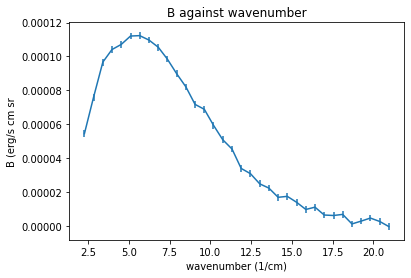

In [ ]:
fileName = "/content/drive/MyDrive/CMBAnalysis/data/cobe_data.TXT"
data = np.loadtxt(fileName,dtype=float)
Berr = 2*10**-6

v = data[:,0]
B = data[:,1]

h = 6.6*10**-27
c = 3*10**10
kB = 1.38*10**-16

def get_B(v,T):
  get_B = 2*h*(c**2)*(v**3)*(1/(np.exp((h*c*v)/(kB*T))-1))
  return get_B

plt.errorbar(v,B,yerr=Berr,xerr=None)
plt.title("B against wavenumber")
plt.xlabel("wavenumber (1/cm)")
plt.ylabel("B (erg/s cm sr")

"""
scipy.optimize.curve_fit(get_B,v,B)
"""

In [ ]:
error = np.zeros(34)
for i in range(0,34):
  error[i] = Berr
  i+=1

In [ ]:
scipy.optimize.curve_fit(get_B,v,B,sigma = error)

(array([2.70890071]), array([[1.61891785e-05]]))

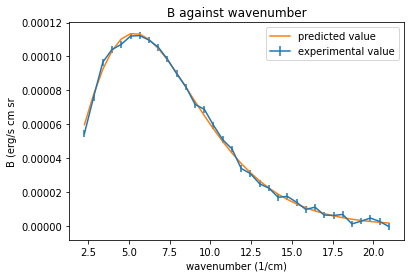

In [ ]:
T = 2.70890071
plt.errorbar(v,B,yerr=Berr,xerr=None, label = 'experimental value')
plt.plot(v,get_B(v,T), label = 'predicted value')
plt.title("B against wavenumber")
plt.xlabel("wavenumber (1/cm)")
plt.ylabel("B (erg/s cm sr")
plt.legend()

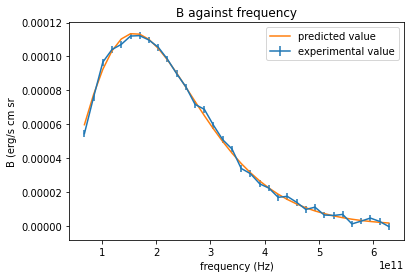

In [ ]:
f = c*v
plt.errorbar(f,B,yerr=Berr,xerr=None, label = 'experimental value')
plt.plot(f,get_B(v,T), label = 'predicted value')
plt.title("B against frequency")
plt.xlabel("frequency (Hz)")
plt.ylabel("B (erg/s cm sr")
plt.legend()

# Planck Temperature Anisotropies: An Introduction



The temperature of the CMB is nearly uniform across the sky, as can be seen from the following sky map of the Planck data.



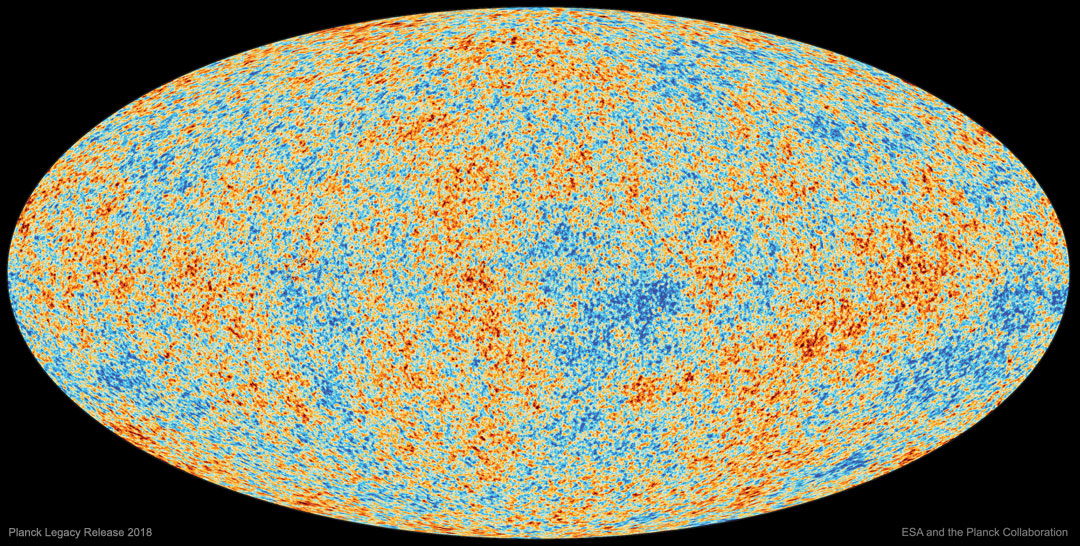





This map is an example of what's called a Mollweide projection.  It is a way of representing information from the surface of a 3D sphere in a 2D plane.  The Planck satellite gathers CMB photons traveling towards Earth from all directions (i.e., a 3D spherical shell surrounding Earth), and this map summarizes all the information.  The center of the map corresponds to a [Galactic](https://en.wikipedia.org/wiki/Galactic_coordinate_system) longitude $l = 0^\circ$ and latitude $b=0^\circ$.  The top-most(bottom-most) point corresponds to Galactic longitude $l = 0^\circ$ and latitude $b=90^\circ$($-90^\circ$).  The left-most and right-most points on the map correspond to $l=180^\circ$ and $b=0^\circ$ --- i.e., the Galactic anticenter.

The red and blue spots in the map correspond to hot and cold spots, respectively, in the temperature fluctuations.  The temperature fluctuations are defined as 

$$\frac{\delta T}{T}(\theta, \phi) = \frac{T(\theta, \phi) - \langle T \rangle}{\langle T \rangle} \, ,$$

where $\theta$ and $\phi$ correspond to angular coordinates on the celestial sphere, and the angle brackets denote an average.

These temperature fluctuations encode information about the Universe.  The following exercises will help you gain some intuition for what exactly we can learn from these temperature anisotropies.


To start, we need to find a good way of quantifying the properties of the temperature fluctuations in the map above.  For example, one relevant question is understanding the prevalance of features that extend over a particular angular scale.  

It turns out that spherical harmonics are a very useful way of summarizing this information.  In particular, we can write the temperature fluctuations in terms of the [spherical harmonic functions](https://en.wikipedia.org/wiki/Spherical_harmonics) $Y_\ell^m(\theta, \phi)$ as follows:

$$ \frac{\delta T}{T}(\theta, \phi) = \sum_{\ell=0}^{\infty} \sum_{m=-\ell}^{\ell} a_{\ell}^m \, Y_{\ell}^m (\theta, \phi) \, $$

where the $a_\ell^m$ are constants associated with each value of $\ell$ and $m$.

We will now try to understand how these spherical harmonic functions look like on the celestial sphere.  

Start by defining an array for $\phi$ and $\theta$, the spherical angular coordinates.

In [ ]:
phi = np.zeros(100)
for i in range(0,100):
  phi[i] = (np.pi*i)/100
  i+=1

theta = np.zeros(100)
for j in range(0,100):
  theta[j] = (2*np.pi*j)/100
  j+=1

The following code cell combines the $\phi$ and $\theta$ arrays into a matrix:

In [ ]:
phi, theta = np.meshgrid(phi, theta)
print(phi)

[[0.         0.03141593 0.06283185 ... 3.04734487 3.0787608  3.11017673]
 [0.         0.03141593 0.06283185 ... 3.04734487 3.0787608  3.11017673]
 [0.         0.03141593 0.06283185 ... 3.04734487 3.0787608  3.11017673]
 ...
 [0.         0.03141593 0.06283185 ... 3.04734487 3.0787608  3.11017673]
 [0.         0.03141593 0.06283185 ... 3.04734487 3.0787608  3.11017673]
 [0.         0.03141593 0.06283185 ... 3.04734487 3.0787608  3.11017673]]


Next, define the Cartesian coordinates $(x, y, z)$ of the unit sphere.  In other words, you should end up with an array for $x$, encompassing all values of $\theta$ and $\phi$ from above (and so on for $y$ and $z$).

In [ ]:
x = np.sin(phi)*np.cos(theta)
y = np.sin(phi)*np.sin(theta)
z = np.cos(phi)

For a given $m$ and $\ell$, use the `scipy` function [sph_harm](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.sph_harm.html) to define the spherical harmonic.  Only select the [real](https://numpy.org/doc/stable/reference/generated/numpy.real.html) part of the result.  Call your results `fcolors`.  For visualization purposes, you will want to normalize `fcolors` to fall between the range of [0, 1].

In [ ]:
def spher_harm(m,l):
  fcolors = np.real(scipy.special.sph_harm(m,l,theta,phi))
  max = np.max(fcolors)
  norm_fcolors = fcolors/max
  return norm_fcolors

Lastly, plot the (normalized) values of `fcolors` on the celestial sphere.  

```
fig = plt.figure(figsize=plt.figaspect(1.))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface( <fill_in>, <fill_in>, <fill_in>, rstride=1, cstride=1, facecolors=cm.seismic(fcolors)
ax.set_axis_off()
plt.show()
```
where `<fill_in>` are arrays that you need to input.

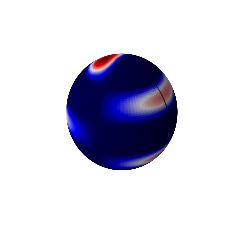

In [ ]:
fig = plt.figure(figsize=plt.figaspect(1.))
ax = fig.add_subplot(111, projection='3d')
m = 1
l = 5
normfcolors = spher_harm(m,l)
ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=cm.seismic(spher_harm(m,l)))
ax.set_axis_off()
plt.show()

Play around with your code from above, trying out different values of $\ell, m$.  How do the overall structures on the sphere correlate with $\ell$? Describe your results in the text box below. 

Changing the values of l and m seem to change the location, size and number of the big red spots on the sphere. The number of red spots seems to be equal to the value of l.

# Planck Power Spectrum

The correlation function of the temperature oscillations is defined as 

$$ C(\theta) = \left \langle \frac{\delta T}{T}(\mathbf{r}) \, \frac{\delta T}{T}(\mathbf{r}') \right \rangle_{\mathbf{r}\cdot \mathbf{r}' = \cos\theta} \,.$$

Note that this is the correlation of the temperature fluctions on two separate points on the celestial sphere defined by the position vectors $\mathbf{r}$ and $\mathbf{r}'$, which are separated by angle $\theta$.  

It is useful to expand the correlation function in terms of spherical harmonics, as follows:

$$ C(\theta) = \frac{1}{4\pi} \sum_{\ell = 0}^{\infty} (2 \ell + 1) C_\ell P_\ell (\cos\theta) \, ,$$

where $P_\ell(\cos\theta)$ are [Legendre polynomials](https://en.wikipedia.org/wiki/Legendre_polynomials) and 

$$ C_\ell = \frac{1}{2\ell +1} \sum_m |a_\ell^m |^2 \, .$$

You can think of $C_\ell$ as containing information about the temperature fluctuations $\delta T/T$ on angular scale $\theta \sim 180^\circ/\ell$.

The `power spectrum` of the Planck data provides the values of the meaured $C_\ell's$ as a function of $\ell$.  More specifically, the data is provided in terms of 

$$ D_\ell \equiv \frac{\ell (\ell +1)}{2\pi} C_\ell \, , $$

in units of $\mu$K$^2$.

In the following, load the Planck data from the `COM_PowerSpect_CMB-TT-binned_R3.01.txt` data file.  The first column corresponds to $\ell$, the second column is $D_\ell$, and the third and fourth columns corresponds to the $\pm$ error in $D_\ell$.

Using [plt.errorbar()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html), plot the Planck power spectrum ($D_\ell$ vs. $\ell$).  Make sure to include the error bars.  



[50.7654876  54.7101576  64.976644   76.9143744  86.5856259  90.5533459
 87.1348811  76.9383697  62.5199141  47.1589439  33.8762191  24.8190562
 20.7109083  20.6713695  22.7523861  24.9726104  25.9184118  25.0510538
 22.7209283  19.8505488  17.5025264  16.4306044  16.7990643  18.1645476
 19.7363538  20.706222   20.519762   19.0381031  16.5790348  13.7374917
 11.1420483   9.28646475  8.37987     8.30074773  8.68575434  9.11274984
  9.26050628  8.98528122  8.33171031  7.54508665  6.64322644  5.98585735
  5.68666086  5.71800485  5.94089388  6.17243469  6.25632882  6.1114343
  5.74544667  5.24258624  4.72393254  4.300796    4.04442416  3.96833591
  4.03423921  4.17356282  4.3166551   4.41586492  4.45733427  4.45892926
  4.45749277  4.49350451  4.59652807  4.77758093  5.02866666  5.42839879
  5.86880339  6.20024969  6.53323083  6.87393629  7.23789713  7.64417922
  8.10965997  8.64541703  9.2555667   9.93861339 10.6905048  11.5085752
 12.3926722  13.3433129  14.3819739  15.5113561  20.939826

Text(0, 0.5, 'D_l (mu K^2)')

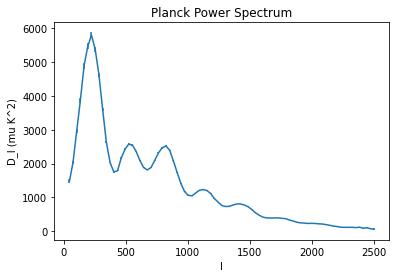

In [ ]:
fileName = "/content/drive/MyDrive/CMBAnalysis/data/COM_PowerSpect_CMB-TT-binned_R3.01.txt"
data1 = np.loadtxt(fileName,dtype=float)

l = data1[:,0]
D_l = data1[:,1]
error = data1[:,2]

print(error)

plt.errorbar(l,D_l,yerr=error,xerr=None)
plt.title("Planck Power Spectrum")
plt.xlabel("l")
plt.ylabel("D_l (mu K^2)")

Remake the the Planck power spectrum, but this time plotting it in terms of the (approximate) angular scale in degrees.  You might find it useful to plot the $x$-axis in terms of a logarithmic scale.

Text(0, 0.5, 'D_l (mu K^2)')

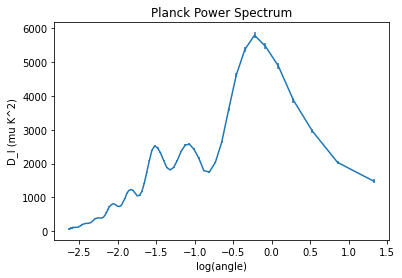

In [ ]:
angle = np.divide(180,l)

plt.errorbar(np.log(angle),D_l,yerr=error,xerr=None)
plt.title("Planck Power Spectrum")
plt.xlabel("log(angle)")
plt.ylabel("D_l (mu K^2)")

Next, find the value of $D_\ell$ and $\ell$ that are associated with the first three peaks in the Planck power spectrum.  There are a variety of ways to do this.  Some functions you might find useful are [np.max()](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.max.html) and [np.where()](https://numpy.org/doc/stable/reference/generated/numpy.where.html).

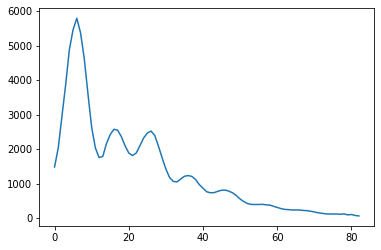

In [ ]:
np.max(D_l)
plt.plot(D_l)

In [ ]:
# first maximum
print(np.max(D_l))
np.where(D_l == np.max(D_l))
print(l[6])

5793.43954
225.164945


In [ ]:
# second maximum
D1 = D_l[10:20]
print(np.max(D1))
np.where(D_l == np.max(D_l[12:20]))
print(l[16])

2631.20029
524.78532


In [ ]:
# third maximum
D2 = D_l[20:30]
print(np.max(D2))
np.where(D_l == np.max(D_l[20:]))
print(l[26])

2521.9126
824.681596


The bumps and wiggles that you see in the Planck power spectrum depend on the input cosmological parameters.  In a bit, you will play around with these cosmological parameters to understand how they affect the spectrum.  For now, just upload the power spectrum for the best-fit cosmological parameters (`CAMB_fiducial_scalCLs.dat`), determined using the CAMB interface on NASA's [LAMBDA](http://lambda.gsfc.nasa.gov/toolbox/tb_camb_form.cfm) interface.  

Read in the CAMB theory prediction for the best-fit parameters and over plot it on the Planck power spectrum.  Column 0 of the CAMB file is $\ell$ and Column 1 corresponds to $D_\ell$.

In [ ]:
fileName = "/content/drive/MyDrive/CMBAnalysis/data/CAMB_fiducial_scalCls.dat"
data2 = np.loadtxt(fileName,dtype=float)

l_2 = data2[:,0]
D_l2 = data2[:,1]

The following code block creates a realization of a CMB sky map, given a $D_\ell$ as a function of $\ell$.  Unlike the Planck sky map you saw up above, the sky map created by this code block is only for a small patch of sky that is $\sim 8^\circ \times 8^\circ$.  You do not need to alter this code at all, except in the fourth line from the bottom of the block, where you should make sure that $\ell$ and $D_\ell$ correspond to the relevant arrays from the CAMB theory prediction.

This code block was written by Jeff McMahon and Renée Hložek.  



map mean: 2.0786967419743747 map rms: 92.66101415169588


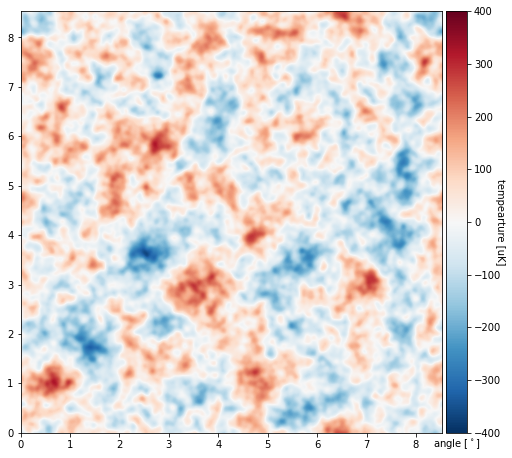

<Figure size 432x288 with 0 Axes>

In [ ]:
## variables to set up the size of the map
N = 2**10  # this is the number of pixels in a linear dimension
            ## since we are using lots of FFTs this should be a factor of 2^N
pix_size  = 0.5 # size of a pixel in arcminutes

## variables to set up the map plots
c_min = -400  # minimum for color bar
c_max = 400   # maximum for color bar
X_width = N*pix_size/60.  # horizontal map width in degrees
Y_width = N*pix_size/60.  # vertical map width in degrees


def make_CMB_T_map(N,pix_size,ell,DlTT):
    "makes a realization of a simulated CMB sky map given an input DlTT as a function of ell," 
    "the pixel size (pix_size) required and the number N of pixels in the linear dimension."
    #np.random.seed(100)
    # convert Dl to Cl
    ClTT = DlTT * 2 * np.pi / (ell*(ell+1.))
    ClTT[0] = 0. # set the monopole and the dipole of the Cl spectrum to zero
    ClTT[1] = 0.

    # make a 2D real space coordinate system
    onesvec = np.ones(N)
    inds  = (np.arange(N)+.5 - N/2.) /(N-1.) # create an array of size N between -0.5 and +0.5
    # compute the outer product matrix: X[i, j] = onesvec[i] * inds[j] for i,j 
    # in range(N), which is just N rows copies of inds - for the x dimension
    X = np.outer(onesvec,inds) 
    # compute the transpose for the y dimension
    Y = np.transpose(X)
    # radial component R
    R = np.sqrt(X**2. + Y**2.)
    
    # now make a 2D CMB power spectrum
    pix_to_rad = (pix_size/60. * np.pi/180.) # going from pix_size in arcmins to degrees and then degrees to radians
    ell_scale_factor = 2. * np.pi /pix_to_rad  # now relating the angular size in radians to multipoles
    ell2d = R * ell_scale_factor # making a fourier space analogue to the real space R vector
    ClTT_expanded = np.zeros(int(ell2d.max())+1) 
    # making an expanded Cl spectrum (of zeros) that goes all the way to the size of the 2D ell vector
    ClTT_expanded[0:(ClTT.size)] = ClTT # fill in the Cls until the max of the ClTT vector

    # the 2D Cl spectrum is defined on the multiple vector set by the pixel scale
    CLTT2d = ClTT_expanded[ell2d.astype(int)] 
    #plt.imshow(np.log(CLTT2d))
        
    
    # now make a realization of the CMB with the given power spectrum in real space
    random_array_for_T = np.random.normal(0,1,(N,N))
    FT_random_array_for_T = np.fft.fft2(random_array_for_T)   # take FFT since we are in Fourier space 
    
    FT_2d = np.sqrt(CLTT2d) * FT_random_array_for_T # we take the sqrt since the power spectrum is T^2
    plt.imshow(np.real(FT_2d))
        
    
    ## make a plot of the 2D cmb simulated map in Fourier space, note the x and y axis labels need to be fixed
    #Plot_CMB_Map(np.real(np.conj(FT_2d)*FT_2d*ell2d * (ell2d+1)/2/np.pi),0,np.max(np.conj(FT_2d)*FT_2d*ell2d * (ell2d+1)/2/np.pi),ell2d.max(),ell2d.max())  ###
    
    # move back from ell space to real space
    CMB_T = np.fft.ifft2(np.fft.fftshift(FT_2d)) 
    # move back to pixel space for the map
    CMB_T = CMB_T/(pix_size /60.* np.pi/180.)
    # we only want to plot the real component
    CMB_T = np.real(CMB_T)

    ## return the map
    return(CMB_T)
  ###############################

def Plot_CMB_Map(Map_to_Plot,c_min,c_max,X_width,Y_width):
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    print("map mean:",np.mean(Map_to_Plot),"map rms:",np.std(Map_to_Plot))
    plt.gcf().set_size_inches(8, 8)
    im = plt.imshow(Map_to_Plot, interpolation='bilinear', origin='lower',cmap=cm.RdBu_r)
    im.set_clim(c_min,c_max)
    ax=plt.gca()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)

    cbar = plt.colorbar(im, cax=cax)
    #cbar = plt.colorbar()
    im.set_extent([0,X_width,0,Y_width])
    plt.ylabel('angle $[^\circ]$')
    plt.xlabel('angle $[^\circ]$')
    cbar.set_label('tempearture [uK]', rotation=270)
    
    plt.show()
    return(0)
  ###############################

## make a CMB T map
CMB_T = make_CMB_T_map(N,pix_size,l_2,D_l2)
Plot_CMB_Map(CMB_T,c_min,c_max,X_width,Y_width)
plt.savefig('cmb1.png')
plt.clf()


What happens when you generate the sky map multiple times?  What happens to the positions of the hot and cold spots?  What happens to the angular size of the spots?

# Cosmological Parameters

Now, we're going to model different types of universes assuming different cosmological parameters, and see what affect that has on the angular power spectrum and the temperature anisotropy map.

Recall that the sum of the matter, curvature, and dark energy density is $$\Omega_{m, 0} + \Omega_{k, 0} + \Omega_{\Lambda, 0} = 1 \, .$$

The matter density is the sum of the dark matter ($\Omega_{c,0}$) and baryonic ($\Omega_{b,0}$) contributions:

$$\Omega_{m, 0} = \Omega_{c, 0} + \Omega_{b, 0} \, .$$

The contributions of these separate components have important consequences for the measured power spectrum.  You will now use the CAMB web interface to generate different theoretical predictions for the CMB power spectrum, for different values of these comsological parameters.  

Take $\Omega_{b,0} = 0.05$ and $\Omega_{c,0} = 0.25$ to start.  (Be careful throughout as to whether we're talking about $\Omega$ or $\Omega h^2$, where $h \approx 0.7$ and is related to the Hubble constant.)  

You will see lots of parameters that you can tweak in the CAMB interface.  For our purposes, just set $\Omega_v h^2 = 0$ and leave all other parameters to default (except for what you will be instructed to change below). 

Our first goal is to understand what the first peak in the power spectrum tells us.  To see this, consider two cases:

1. Set $\Omega_k = 0$ (which automatically puts $\Omega_\Lambda = 0.7$)

2. Set $\Omega_k = 0.7$ (which automatically puts $\Omega_\Lambda = 0$)

You can verify that everything looks alright in the output page that is produced after CAMB runs.  Download the .dat file labeled as "Scalar Output".  The first column of the data file corresponds to $\ell$ while the second column corresponds to the $D_\ell$'s.

Plot your two theory curves together, as well as the Planck data for reference.  

In [ ]:
fileName = "/content/drive/MyDrive/CMBAnalysis/data/camb_84619087_scalcls.dat.txt"
data0 = np.loadtxt(fileName,dtype=float)

l_0 = data0[:,0]
D_l0 = data0[:,1]

In [ ]:
fileName = "/content/drive/MyDrive/CMBAnalysis/data/camb_40490290_scalcls.dat.txt"
data07 = np.loadtxt(fileName,dtype=float)

l_07 = data07[:,0]
D_l07 = data07[:,1]

In [ ]:
plt.plot(l_0,D_l0,'red')
plt.plot(l_07,D_l07,'magenta')
plt.errorbar(l,D_l,yerr=error,xerr=None)

plt.title("Planck Power Spectrum")
plt.xlabel("l")
plt.ylabel("D_l (mu K^2)")

NameError: ignored

From these results, can you say what we learn from the location (i.e., associated angular scale) of the first peak? 

From these results, $\Omega_k = 0$ is the value that allows for the more accurate model. The fit between this data and power spectrum data was very good. The first peak of the $\Omega_k = 0$ model occurs at roughly 0.8 degrees. Therefore, the $\Omega_k = 0.7$ model is more innaccurate

From now on, we will keep $\Omega_k=0$.  Let's now understand how the baryon density affects the power spectrum.  Try two cases:

1. Set $\Omega_{b,0}h^2 = 0.01$

2. Set $\Omega_{b,0}h^2 = 0.06$

In both cases, keep $\Omega_\Lambda = 0.7$ and ensure that $\Omega_{m,0} = 0.3$.  In other words, the dark energy contribution is unchanged and the TOTAL matter density is unchanged.

In [ ]:
fileName = "/content/drive/MyDrive/CMBAnalysis/data/camb_18075422_scalcls.dat.txt"
data01 = np.loadtxt(fileName,dtype=float)

l_001 = data01[:,0]
D_l001 = data01[:,1]

In [ ]:
fileName = "/content/drive/MyDrive/CMBAnalysis/data/camb_20543381_scalcls.dat.txt"
data06 = np.loadtxt(fileName,dtype=float)

l_006 = data06[:,0]
D_l006 = data06[:,1]

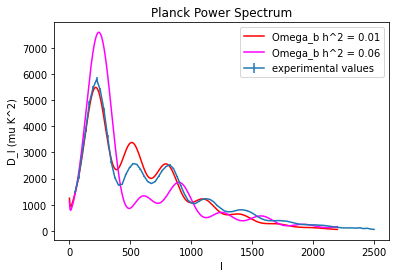

In [ ]:
plt.plot(l_001,D_l001,'red', label = "Omega_b h^2 = 0.01")
plt.plot(l_006,D_l006,'magenta', label = "Omega_b h^2 = 0.06")
plt.errorbar(l,D_l,yerr=error,xerr=None, label = "experimental values")
plt.title("Planck Power Spectrum")
plt.xlabel("l")
plt.ylabel("D_l (mu K^2)")
plt.legend()

What happens to the relative height of the second peak, compared to the first, as the baryon density increases?  

The relative height of the second peak decreases as baryon density increases. 

Now, we will keep the baryon density constant at $\Omega_{b,0} h^2 = 0.0245$ and change the amount of dark matter by increasing the overall matter density. Try two cases:

1. Set $\Omega_{m,0}h^2 = 0.05$

2. Set $\Omega_{m,0}h^2 = 0.4$

In [ ]:
fileName = "/content/drive/MyDrive/CMBAnalysis/data/camb_69264893_scalcls.dat.txt"
data05 = np.loadtxt(fileName,dtype=float)

l_005 = data05[:,0]
D_l005 = data05[:,1]

In [ ]:
fileName = "/content/drive/MyDrive/CMBAnalysis/data/camb_56405173_scalcls.dat.txt"
data4 = np.loadtxt(fileName,dtype=float)

l_4 = data4[:,0]
D_4 = data4[:,1]

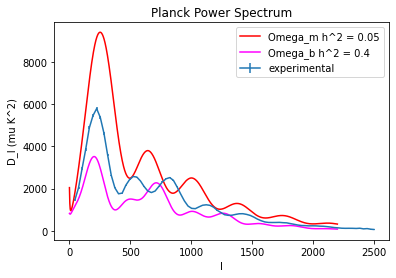

In [ ]:
plt.plot(l_005,D_l005,'red', label = "Omega_m h^2 = 0.05")
plt.plot(l_4,D_4,'magenta', label = "Omega_b h^2 = 0.4")
plt.errorbar(l,D_l,yerr=error,xerr=None, label = "experimental")
plt.title("Planck Power Spectrum")
plt.xlabel("l")
plt.ylabel("D_l (mu K^2)")
plt.legend()

What happens to the overall amplitude of all the peaks as the matter density increases?  What happens to the height of the third peak, relative to the second peak in this case?

As matter density increases, the relative height of the third peak is greater than that of the second peak. 

Lastly, have some fun creating sky maps for some of the  strange cosmologies you considered above.  What happens to the angular scales of the temperature fluctuations in each case?

map mean: 12.565400101192393 map rms: 95.3556550231669


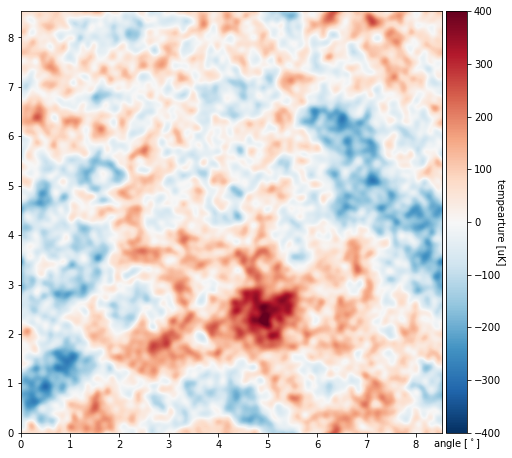

<Figure size 432x288 with 0 Axes>

In [ ]:
## variables to set up the size of the map
N = 2**10  # this is the number of pixels in a linear dimension
            ## since we are using lots of FFTs this should be a factor of 2^N
pix_size  = 0.5 # size of a pixel in arcminutes

## variables to set up the map plots
c_min = -400  # minimum for color bar
c_max = 400   # maximum for color bar
X_width = N*pix_size/60.  # horizontal map width in degrees
Y_width = N*pix_size/60.  # vertical map width in degrees


def make_CMB_T_map(N,pix_size,ell,DlTT):
    "makes a realization of a simulated CMB sky map given an input DlTT as a function of ell," 
    "the pixel size (pix_size) required and the number N of pixels in the linear dimension."
    #np.random.seed(100)
    # convert Dl to Cl
    ClTT = DlTT * 2 * np.pi / (ell*(ell+1.))
    ClTT[0] = 0. # set the monopole and the dipole of the Cl spectrum to zero
    ClTT[1] = 0.

    # make a 2D real space coordinate system
    onesvec = np.ones(N)
    inds  = (np.arange(N)+.5 - N/2.) /(N-1.) # create an array of size N between -0.5 and +0.5
    # compute the outer product matrix: X[i, j] = onesvec[i] * inds[j] for i,j 
    # in range(N), which is just N rows copies of inds - for the x dimension
    X = np.outer(onesvec,inds) 
    # compute the transpose for the y dimension
    Y = np.transpose(X)
    # radial component R
    R = np.sqrt(X**2. + Y**2.)
    
    # now make a 2D CMB power spectrum
    pix_to_rad = (pix_size/60. * np.pi/180.) # going from pix_size in arcmins to degrees and then degrees to radians
    ell_scale_factor = 2. * np.pi /pix_to_rad  # now relating the angular size in radians to multipoles
    ell2d = R * ell_scale_factor # making a fourier space analogue to the real space R vector
    ClTT_expanded = np.zeros(int(ell2d.max())+1) 
    # making an expanded Cl spectrum (of zeros) that goes all the way to the size of the 2D ell vector
    ClTT_expanded[0:(ClTT.size)] = ClTT # fill in the Cls until the max of the ClTT vector

    # the 2D Cl spectrum is defined on the multiple vector set by the pixel scale
    CLTT2d = ClTT_expanded[ell2d.astype(int)] 
    #plt.imshow(np.log(CLTT2d))
        
    
    # now make a realization of the CMB with the given power spectrum in real space
    random_array_for_T = np.random.normal(0,1,(N,N))
    FT_random_array_for_T = np.fft.fft2(random_array_for_T)   # take FFT since we are in Fourier space 
    
    FT_2d = np.sqrt(CLTT2d) * FT_random_array_for_T # we take the sqrt since the power spectrum is T^2
    plt.imshow(np.real(FT_2d))
        
    
    ## make a plot of the 2D cmb simulated map in Fourier space, note the x and y axis labels need to be fixed
    #Plot_CMB_Map(np.real(np.conj(FT_2d)*FT_2d*ell2d * (ell2d+1)/2/np.pi),0,np.max(np.conj(FT_2d)*FT_2d*ell2d * (ell2d+1)/2/np.pi),ell2d.max(),ell2d.max())  ###
    
    # move back from ell space to real space
    CMB_T = np.fft.ifft2(np.fft.fftshift(FT_2d)) 
    # move back to pixel space for the map
    CMB_T = CMB_T/(pix_size /60.* np.pi/180.)
    # we only want to plot the real component
    CMB_T = np.real(CMB_T)

    ## return the map
    return(CMB_T)
  ###############################

def Plot_CMB_Map(Map_to_Plot,c_min,c_max,X_width,Y_width):
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    print("map mean:",np.mean(Map_to_Plot),"map rms:",np.std(Map_to_Plot))
    plt.gcf().set_size_inches(8, 8)
    im = plt.imshow(Map_to_Plot, interpolation='bilinear', origin='lower',cmap=cm.RdBu_r)
    im.set_clim(c_min,c_max)
    ax=plt.gca()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)

    cbar = plt.colorbar(im, cax=cax)
    #cbar = plt.colorbar()
    im.set_extent([0,X_width,0,Y_width])
    plt.ylabel('angle $[^\circ]$')
    plt.xlabel('angle $[^\circ]$')
    cbar.set_label('tempearture [uK]', rotation=270)
    
    plt.show()
    return(0)
  ###############################

## make a CMB T map
CMB_T = make_CMB_T_map(N,pix_size,l_4,D_4)
Plot_CMB_Map(CMB_T,c_min,c_max,X_width,Y_width)
plt.savefig('cmb1.png')
plt.clf()

map mean: 24.0235974039425 map rms: 128.0967288031298


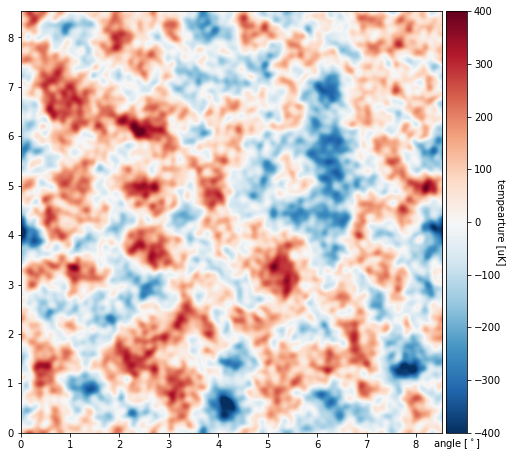

<Figure size 432x288 with 0 Axes>

In [ ]:
## make a CMB T map
CMB_T = make_CMB_T_map(N,pix_size,l_005,D_l005)
Plot_CMB_Map(CMB_T,c_min,c_max,X_width,Y_width)
plt.savefig('cmb1.png')
plt.clf()

map mean: 8.001942013249629 map rms: 104.336931684849


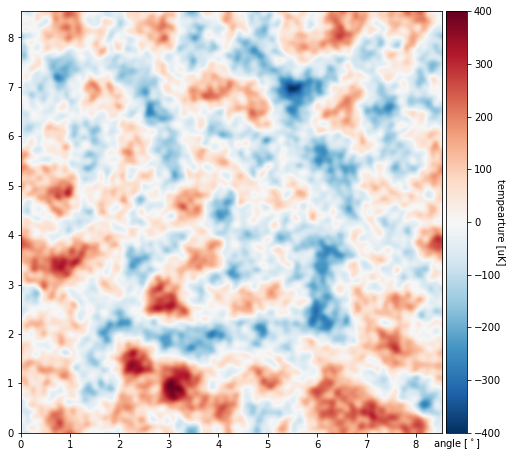

<Figure size 432x288 with 0 Axes>

In [ ]:
## make a CMB T map
CMB_T = make_CMB_T_map(N,pix_size,l_006,D_l006)
Plot_CMB_Map(CMB_T,c_min,c_max,X_width,Y_width)
plt.savefig('cmb1.png')
plt.clf()